# Cats and Dogs

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

rows = 128
cols= 128

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os, shutil
# print(os.listdir("../input"))

In [5]:
source_data_dir = "data/train"
try:
    os.mkdir("data/training_set/cats")
    os.mkdir("data/training_set/dogs")
    os.mkdir("data/validation_set/cats")
    os.mkdir("data/validation_set/dogs")
except:
    pass

In [6]:
if os.listdir("data/training_set/cats")=="":
    # If the folder contains no pictures start copying
    for file in ["cat.{}.jpg".format(i) for i in range (2000)]:
        shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("data/training_set/cats", file))
    for file in ["dog.{}.jpg".format(i) for i in range (2000)]:
        shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("data/training_set/dogs", file))
    for file in ["cat.{}.jpg".format(i) for i in range (2000, 2500)]:
        shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("data/validation_set/cats", file))
    for file in ["dog.{}.jpg".format(i) for i in range (2000, 2500)]:
        shutil.copyfile(os.path.join(source_data_dir, file), os.path.join("data/validation_set/dogs", file))

# Data Pre-processing

In [9]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models

model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(rows, cols, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
__________

In [10]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.rmsprop(lr=1e-4),
              metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

x_train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,)
x_val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = x_train_datagen.flow_from_directory("data/training_set",
                                                    target_size=(rows,cols),
                                                    batch_size=40,
                                                    class_mode='binary')
val_datagen = x_val_datagen.flow_from_directory("data/validation_set",
                                                target_size=(rows,cols),
                                                batch_size=40,
                                                class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
epochs = 100

H = model.fit_generator(train_datagen,
                        steps_per_epoch=100, 
                        epochs=epochs,
                        validation_data=val_datagen,
                        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 25s 255ms/step - loss: 0.6929 - acc: 0.5260 - val_loss: 0.6640 - val_acc: 0.6050
Epoch 2/100
100/100 [==============================] - 24s 236ms/step - loss: 0.6674 - acc: 0.5768 - val_loss: 0.6619 - val_acc: 0.5500
Epoch 3/100
100/100 [==============================] - 22s 219ms/step - loss: 0.6528 - acc: 0.6050 - val_loss: 0.6084 - val_acc: 0.6670
Epoch 4/100
100/100 [==============================] - 22s 225ms/step - loss: 0.6436 - acc: 0.6293 - val_loss: 0.5900 - val_acc: 0.7070
Epoch 5/100
100/100 [==============================] - 22s 220ms/step - loss: 0.6236 - acc: 0.6460 - val_loss: 0.5708 - val_acc: 0.7060
Epoch 6/100
100/100 [==============================] - 22s 220ms/step - loss: 0.6151 - acc: 0.6575 - val_loss: 0.5969 - val_acc: 0.6530
Epoch 7/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6080 - acc: 0.6748 - val_loss: 0.5758 - val_acc: 0.7030
Epoch 8/100
100/100 [===========================

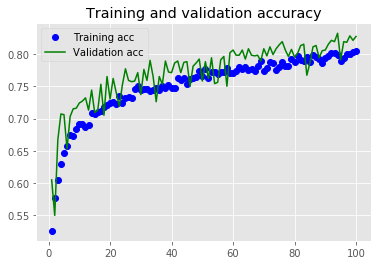

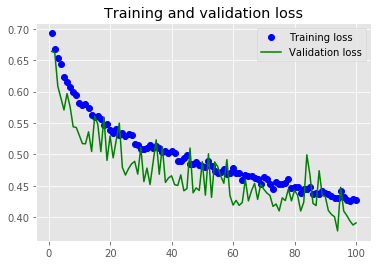

In [16]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

References:

1. [Anthony Tanbakuchi](http://tanbakuchi.com/posts/comparison-of-openv-interpolation-algorithms/ )







